In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import sys, os, importlib
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import miptlabs as ml
importlib.reload(ml)

importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [3]:
C = ml.PQ(3e-9*u.farad, epsilon=0.05)
R = ml.PQ(75*u.ohm, epsilon=0.05)
R0 = ml.PQ(1*u.ohm, epsilon=0.05)
R1 = ml.PQ(500*u.ohm, epsilon=0.05)
R2 = ml.PQ(3000*u.ohm, epsilon=0.05)
L_desired = ml.PQ(100e-3*u.henry, sigma=0.1e-3*u.henry)
f = 1/(2*np.pi*np.sqrt(C*L_desired))
print(f) # Приблизительная резонансная частота контура (по примерному значению индуктивности)

9190±230 1/(sqrt(F)*sqrt(H)) (2.5%)


In [4]:
data = pd.read_csv('lab2.2.2.csv')
df = pd.DataFrame()
df2 = pd.DataFrame()
df['f.0'] = data.apply(lambda row: ml.PQ(row['f']*1e3*u.hz, sigma=row['f_sigma']*1e3*u.hz), axis=1)
df['U.0'] = data.apply(lambda row: ml.PQ(row['U']*row['U_mult']*1e-3*u.volt, 
                                         sigma=0.2*row['U_mult']*1e-3*u.volt), axis=1)
df['I_0.0'] = ml.pqarray((df['U.0']/R))

df['f.1'] = data.apply(lambda row: ml.PQ(row['f.1']*1e3*u.hz, sigma=row['f_sigma']*1e3*u.hz), axis=1)
df['U.1'] = data.apply(lambda row: ml.PQ(row['U.1']*row['U_mult.1']*10e-3*u.volt, 
                                           sigma=0.2*row['U_mult.1']*1e-3*u.volt), axis=1)
df['I_0.1'] = ml.pqarray((df['U.1']/R))

df['f.2'] = data[~data['f.2'].isnull()].apply(lambda row: ml.PQ(row['f.2']*1e3*u.hz, 
                                                                  sigma=row['f_sigma']*1e3*u.hz), axis=1)
df['U.2'] = data[~data['U.2'].isnull()].apply(lambda row: ml.PQ(row['U.2']*row['U_mult.2']*10e-3*u.volt, 
                                           sigma=0.2*row['U_mult.2']*1e-3*u.volt), axis=1)
df['I_0.2'] = pd.Series(ml.pqarray((df['U.2'].dropna()/R)))

df2['C'] = data[~data['C'].isnull()].apply(lambda row: ml.PQ(row['C']*1e-9*u.farad, epsilon=0.05), axis=1)
df2['f_p'] = data[~data['f_p'].isnull()].apply(lambda row: ml.PQ(row['f_p']*1e3*u.hz, sigma=0.01e3*u.hz), axis=1)

# Соответствующие резонансы
f_p0 = ml.PQ(7.81*1e3*u.hz, sigma=0.01*1e3*u.hz)
f_p1 = ml.PQ(7.95*1e3*u.hz, sigma=0.01*1e3*u.hz)
f_p2 = ml.PQ(8.26*1e3*u.hz, sigma=0.01*1e3*u.hz)

df2['F'] = pd.Series(ml.pqarray(1/(2*np.pi*df2['f_p'])**2).repr_as(u.s**2))

In [5]:
display(df)
display(df2)

,f.0,U.0,I_0.0,f.1,U.1,I_0.1,f.2,U.2,I_0.2
0,2010±10 Hz (0.50%),0.0140±0.0010 V (7.1%),(18.70±1.60)*10^-5 V/ohm (8.7%),2000±10 Hz (0.50%),0.1400±0.0010 V (0.71%),(18.7±0.9)*10^-4 V/ohm (5.1%),2000±10 Hz (0.50%),0.1400±0.0010 V (0.71%),(18.7±0.9)*10^-4 V/ohm (5.1%)
1,3010±10 Hz (0.33%),0.0240±0.0010 V (4.2%),(32.00±2.10)*10^-5 V/ohm (6.5%),3000±10 Hz (0.33%),0.2400±0.0010 V (0.42%),(32.00±1.60)*10^-4 V/ohm (5.0%),3000±10 Hz (0.33%),0.2200±0.0010 V (0.45%),(29.30±1.50)*10^-4 V/ohm (5.0%)
2,4000±10 Hz (0.25%),0.0340±0.0010 V (2.9%),(45.30±2.60)*10^-5 V/ohm (5.8%),4000±10 Hz (0.25%),0.3400±0.0010 V (0.29%),(45.30±2.30)*10^-4 V/ohm (5.0%),4000±10 Hz (0.25%),0.3100±0.0010 V (0.32%),(41.30±2.10)*10^-4 V/ohm (5.0%)
3,5000±10 Hz (0.20%),0.0460±0.0020 V (4.3%),(6.1±0.4)*10^-4 V/ohm (6.6%),5000±10 Hz (0.20%),0.4800±0.0020 V (0.42%),(6.4±0.3)*10^-3 V/ohm (5.0%),5000±10 Hz (0.20%),0.4400±0.0020 V (0.45%),(58.70±2.90)*10^-4 V/ohm (5.0%)
4,6000±10 Hz (0.17%),0.0740±0.0020 V (2.7%),(9.9±0.6)*10^-4 V/ohm (5.7%),6000±10 Hz (0.17%),0.7600±0.0020 V (0.26%),(10.1±0.5)*10^-3 V/ohm (5.0%),6000±10 Hz (0.17%),0.6000±0.0020 V (0.33%),(8.0±0.4)*10^-3 V/ohm (5.0%)
5,7000±10 Hz (0.14%),0.148±0.004 V (2.7%),(19.70±1.10)*10^-4 V/ohm (5.7%),7000±10 Hz (0.14%),1.360±0.004 V (0.29%),(18.1±0.9)*10^-3 V/ohm (5.0%),7000±10 Hz (0.14%),0.7800±0.0020 V (0.26%),(10.4±0.5)*10^-3 V/ohm (5.0%)
6,8000±10 Hz (0.12%),0.280±0.010 V (3.6%),(37.30±2.30)*10^-4 V/ohm (6.1%),8000±10 Hz (0.12%),2.200±0.010 V (0.45%),0.0293±0.0015 V/ohm (5.0%),8000±10 Hz (0.12%),0.880±0.004 V (0.45%),(11.7±0.6)*10^-3 V/ohm (5.0%)
7,9000±10 Hz (0.11%),0.170±0.010 V (5.9%),(22.70±1.70)*10^-4 V/ohm (7.7%),9000±10 Hz (0.11%),1.600±0.010 V (0.62%),0.0213±0.0011 V/ohm (5.0%),9000±10 Hz (0.11%),0.880±0.004 V (0.45%),(11.7±0.6)*10^-3 V/ohm (5.0%)
8,10000±10 Hz (0.10%),0.108±0.004 V (3.7%),(14.4±0.9)*10^-4 V/ohm (6.2%),10000±10 Hz (0.10%),1.100±0.010 V (0.91%),(14.7±0.7)*10^-3 V/ohm (5.1%),10000±10 Hz (0.10%),0.720±0.004 V (0.56%),(9.6±0.5)*10^-3 V/ohm (5.0%)
9,11000±10 Hz (0.091%),0.080±0.004 V (5.0%),(10.7±0.8)*10^-4 V/ohm (7.1%),11000±10 Hz (0.091%),0.800±0.004 V (0.50%),(10.7±0.5)*10^-3 V/ohm (5.0%),11000±10 Hz (0.091%),0.640±0.004 V (0.62%),(8.5±0.4)*10^-3 V/ohm (5.0%)


,C,f_p,F
0,(10.0±0.5)*10^-10 F (5.0%),13600±10 Hz (0.074%),(1369.50±2.80)*10^-13 s**2 (0.21%)
1,(20.0±1.0)*10^-10 F (5.0%),9530±10 Hz (0.10%),(278.9±0.8)*10^-12 s**2 (0.30%)
2,(30.00±1.50)*10^-10 F (5.0%),7810±10 Hz (0.13%),(415.30±1.50)*10^-12 s**2 (0.36%)
3,(40.00±2.00)*10^-10 F (5.0%),6660±10 Hz (0.15%),(571.10±2.40)*10^-12 s**2 (0.42%)
4,(50.00±2.50)*10^-10 F (5.0%),5890±10 Hz (0.17%),(73.0±0.4)*10^-11 s**2 (0.48%)
5,(6.0±0.3)*10^-9 F (5.0%),5370±10 Hz (0.19%),(87.8±0.5)*10^-11 s**2 (0.53%)
6,(7.0±0.4)*10^-9 F (5.0%),4910±10 Hz (0.20%),(105.1±0.6)*10^-11 s**2 (0.58%)
7,(8.0±0.4)*10^-9 F (5.0%),4600±10 Hz (0.22%),(119.7±0.7)*10^-11 s**2 (0.61%)
8,(9.0±0.5)*10^-9 F (5.0%),4310±10 Hz (0.23%),(136.4±0.9)*10^-11 s**2 (0.66%)
9,(10.0±0.5)*10^-9 F (5.0%),4100±10 Hz (0.24%),(150.70±1.00)*10^-11 s**2 (0.69%)


In [6]:
#display(ml.prepare_to_print(pd.DataFrame(df['U.0'])))

table_to_print = ml.prepare_to_print(df)
#display(table_to_print)
#write_latex('lab2.2.2 table.tex', table_to_print)
ml.write_latex('lab2.2.2 table1.tex', table_to_print[table_to_print.columns[:10]])
ml.write_latex('lab2.2.2 table2.tex', table_to_print[table_to_print.columns[10:]])

ml.write_latex('lab2.2.2 table3.tex', ml.prepare_to_print(df2))

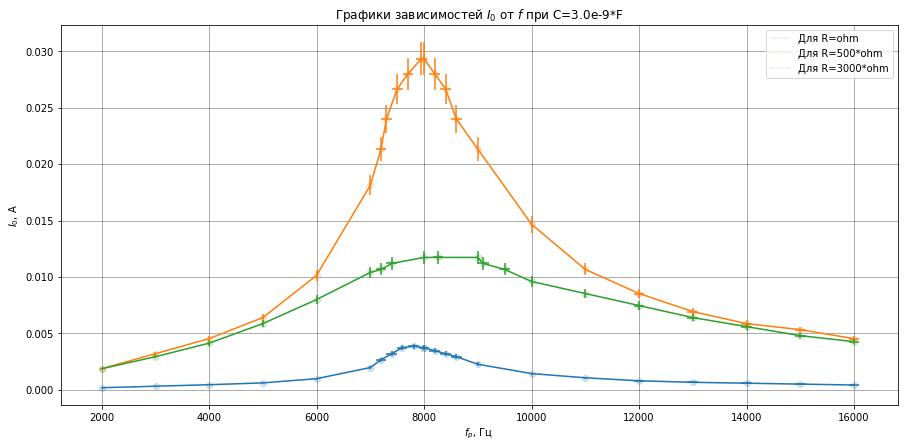

In [7]:
plt.figure(figsize=(15,7))
df=df.sort_values(by='f.0')
ml.plt_pq(df['f.0'], df['I_0.0'], label='Для R=%s'%R0.val)
df=df.sort_values(by='f.1')
ml.plt_pq(df['f.1'], df['I_0.1'], label='Для R=%s'%R1.val)
df=df.sort_values(by='f.2')
ml.plt_pq(df['f.2'].dropna(), df['I_0.2'].dropna(), label='Для R=%s'%R2.val)
plt.xlabel('$f_p$, Гц')
plt.ylabel('$I_0$, A')
plt.title('Графики зависимостей $I_0$ от $f$ при C=%s'%C.val)
plt.show()

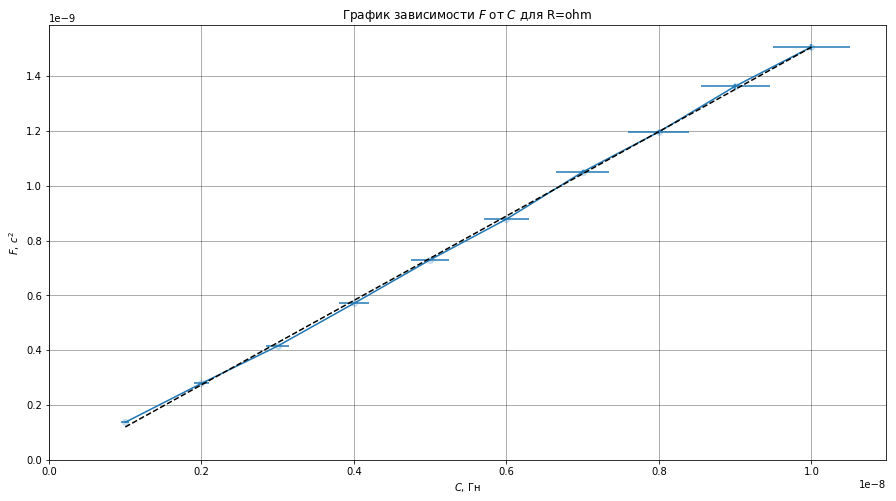

In [8]:
plt.figure(figsize=(15, 8))
ml.plt_pq(df2['C'].dropna(), df2['F'].dropna(), ols=True)
plt.xlabel('$C$, Гн')
plt.ylabel('$F$, $с^2$')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title('График зависимости $F$ от $C$ для R=%s'%R0.val)
plt.show()

In [9]:
ols_coefs = ml.OLS(df2['C'].dropna(), df2['F'].dropna())
print(ols_coefs)
L = ml.PQ(ols_coefs[0][0]*u.henry, sigma=ols_coefs[1][0]*u.henry)
L

(array([  1.54049568e-01,  -3.43741923e-11]), [0.0010685910661757446, 8.8158762959498974e-21])


0.1540±0.0011 H (0.69%)